In [1]:
#Librería para manipulación de datos
library(tidyverse, quietly = TRUE, verbose = FALSE)
library(broom)
#Librerías para manipulación de mapas
library(rgeos)
library(rgdal) 
library(mapproj)
library(ggthemes)
library(rgdal)
library(sf)
library(raster)
#Librerías de graficación
library(ggplot2)
library(leaflet)
library(plotly)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
rgeos version: 0.3-28, (SVN revision 572)
 GEOS runtime version: 3.4.2-CAPI-1.8.2 r3921 
 Linking to sp version: 1.3-1 
 Polygon checking: TRUE 

Loading required package: sp
rgdal: version: 1.3-6, (SVN revision 773)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 1.11.4, released 2016/01/25
 Path to GDAL shared files: /usr/share/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.8.0, 6 March 2012, [PJ_VERSION: 480]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.3-1 
Loading required package: maps

Attaching packag

In [2]:
library(htmlwidgets)
library(IRdisplay)
#saveWidget(nombre, 'nombre.html', selfcontained = FALSE)
#display_html('<iframe src="nombre.html" width=500, height=500></iframe>')

# Mapas estáticos 

In [4]:
download.file("http://thematicmapping.org/downloads/TM_WORLD_BORDERS_SIMPL-0.3.zip", destfile = "dataset/world/TM_WORLD_BORDERS_SIMPL-0.3.zip")



In [5]:
system("unzip dataset/world/TM_WORLD_BORDERS_SIMPL-0.3.zip")

In [6]:
my_spdf <- readOGR( 
  dsn= getwd() , 
  layer="TM_WORLD_BORDERS_SIMPL-0.3",
  verbose=FALSE
)

spdf_fortified <- tidy(my_spdf, region = "NAME")

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vecto

In [7]:
spdf_fortified

long     lat       order hole  piece group         id         
1     74.91574 37.23733   1    FALSE 1     Afghanistan.1 Afghanistan
2     74.39221 37.17507   2    FALSE 1     Afghanistan.1 Afghanistan
3     74.56543 37.02782   3    FALSE 1     Afghanistan.1 Afghanistan
4     72.55664 36.82127   4    FALSE 1     Afghanistan.1 Afghanistan
5     71.24358 36.12971   5    FALSE 1     Afghanistan.1 Afghanistan
6     71.64943 35.42500   6    FALSE 1     Afghanistan.1 Afghanistan
7     70.98749 34.55110   7    FALSE 1     Afghanistan.1 Afghanistan
8     71.08194 34.05582   8    FALSE 1     Afghanistan.1 Afghanistan
9     69.90637 34.03527   9    FALSE 1     Afghanistan.1 Afghanistan
10    70.32694 33.33194  10    FALSE 1     Afghanistan.1 Afghanistan
11    69.50526 33.03416  11    FALSE 1     Afghanistan.1 Afghanistan
12    69.32825 31.94036  12    FALSE 1     Afghanistan.1 Afghanistan
13    68.83305 31.60389  13    FALSE 1     Afghanistan.1 Afghanistan
14    68.16609 31.83305  14    FALSE 1     Afghanistan.1 Afghanistan
15    67.57555 31.53194  15    FALSE 1     Afghanistan.1 Afghanistan
16    67.77805 31.33222  16    FALSE 1     Afghanistan.1 Afghanistan
17    66.72304 31.21222  17    FALSE 1     Afghanistan.1 Afghanistan
18    66.39554 30.94083  18    FALSE 1     Afghanistan.1 Afghanistan
19    66.25665 29.85194  19    FALSE 1     Afghanistan.1 Afghanistan
20    62.48444 29.40611  20    FALSE 1     Afghanistan.1 Afghanistan
21    60.86860 29.86388  21    FALSE 1     Afghanistan.1 Afghanistan
22    61.85110 31.02111  22    FALSE 1     Afghanistan.1 Afghanistan
23    61.71361 31.38333  23    FALSE 1     Afghanistan.1 Afghanistan
24    60.84388 31.49833  24    FALSE 1     Afghanistan.1 Afghanistan
25    60.58250 33.06610  25    FALSE 1     Afghanistan.1 Afghanistan
26    60.94305 33.51944  26    FALSE 1     Afghanistan.1 Afghanistan
27    60.52777 33.64416  27    FALSE 1     Afghanistan.1 Afghanistan
28    60.50833 34.14027  28    FALSE 1     Afghanistan.1 Afghanistan
29    60.87888 34.31972  29    FALSE 1     Afghanistan.1 Afghanistan
30    60.72166 34.52222  30    FALSE 1     Afghanistan.1 Afghanistan
⋮     ⋮        ⋮         ⋮     ⋮     ⋮     ⋮             ⋮          
26235 28.75944 -16.55222 26235 FALSE 1     Zambia.1      Zambia     
26236 27.82528 -16.95917 26236 FALSE 1     Zambia.1      Zambia     
26237 27.03805 -17.95945 26237 FALSE 1     Zambia.1      Zambia     
26238 25.26443 -17.80225 26238 FALSE 1     Zambia.1      Zambia     
26239 24.97000 -17.55972 26239 FALSE 1     Zambia.1      Zambia     
26240 32.98781 -17.26500 26240 FALSE 1     Zimbabwe.1    Zimbabwe   
26241 33.07305 -18.34889 26241 FALSE 1     Zimbabwe.1    Zimbabwe   
26242 32.69917 -18.94445 26242 FALSE 1     Zimbabwe.1    Zimbabwe   
26243 33.01888 -19.94334 26243 FALSE 1     Zimbabwe.1    Zimbabwe   
26244 32.50222 -20.59861 26244 FALSE 1     Zimbabwe.1    Zimbabwe   
26245 32.48888 -21.34445 26245 FALSE 1     Zimbabwe.1    Zimbabwe   
26246 31.29750 -22.41476 26246 FALSE 1     Zimbabwe.1    Zimbabwe   
26247 29.89389 -22.19445 26247 FALSE 1     Zimbabwe.1    Zimbabwe   
26248 29.37362 -22.19241 26248 FALSE 1     Zimbabwe.1    Zimbabwe   
26249 29.06056 -21.79806 26249 FALSE 1     Zimbabwe.1    Zimbabwe   
26250 28.01583 -21.56611 26250 FALSE 1     Zimbabwe.1    Zimbabwe   
26251 27.71317 -20.50643 26251 FALSE 1     Zimbabwe.1    Zimbabwe   
26252 27.28745 -20.49497 26252 FALSE 1     Zimbabwe.1    Zimbabwe   
26253 27.22000 -20.09167 26253 FALSE 1     Zimbabwe.1    Zimbabwe   
26254 26.16611 -19.52778 26254 FALSE 1     Zimbabwe.1    Zimbabwe   
26255 25.26443 -17.80225 26255 FALSE 1     Zimbabwe.1    Zimbabwe   
26256 27.03805 -17.95945 26256 FALSE 1     Zimbabwe.1    Zimbabwe   
26257 27.82528 -16.95917 26257 FALSE 1     Zimbabwe.1    Zimbabwe   
26258 28.75944 -16.55222 26258 FALSE 1     Zimbabwe.1    Zimbabwe   
26259 28.92722 -15.97222 26259 FALSE 1     Zimbabwe.1    Zimbabwe   
26260 30.41576 -15.63187 26260 FALSE 1     Zimbabwe.1    Zimbabwe   
2626

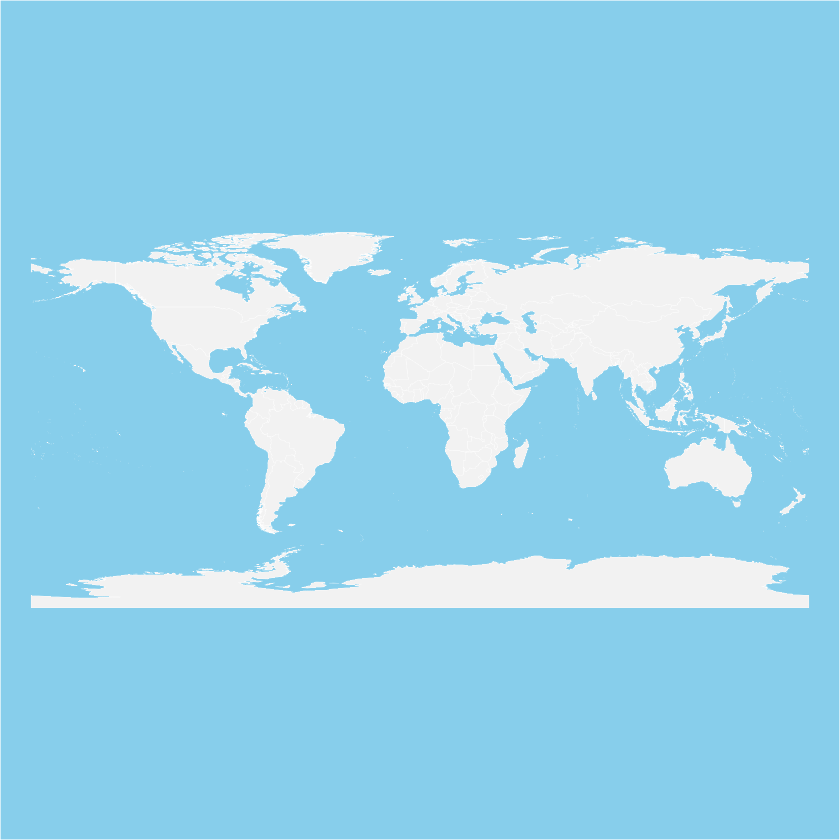

In [8]:
par(mar=c(0,0,0,0))
plot(my_spdf, col="#f2f2f2", bg="skyblue", lwd=0.25, border=0 )

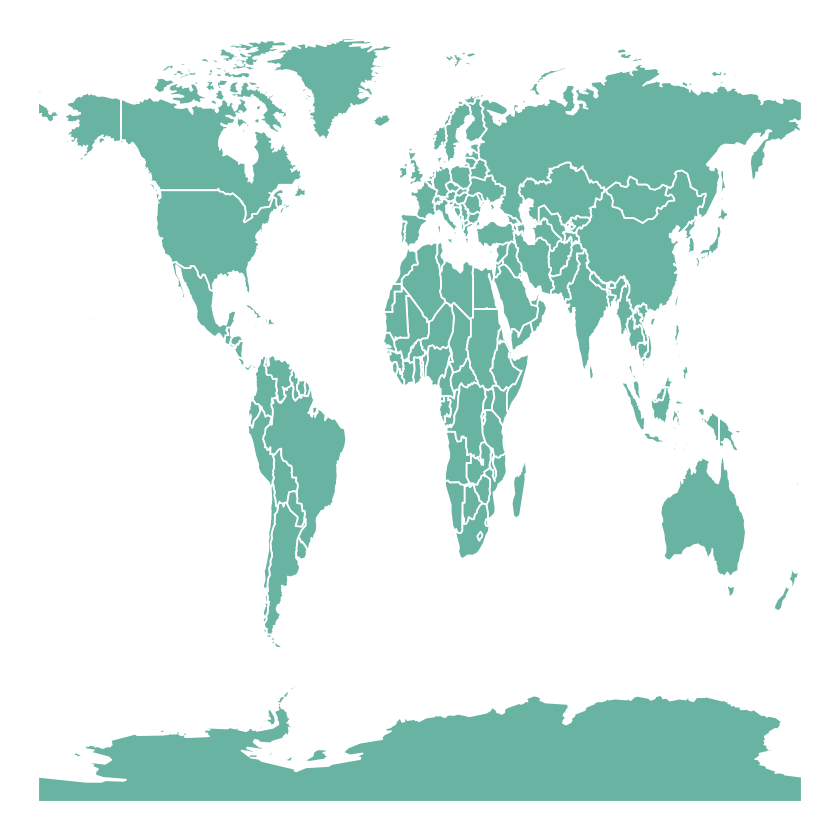

In [9]:
library(ggplot2)
ggplot() +
  geom_polygon(data = spdf_fortified, aes( x = long, y = lat, group = group), fill="#69b3a2", color="white") +
  theme_void() 

In [10]:
path <- "dataset/division.json"

In [11]:
limites = readOGR(path, "limites")

OGR data source with driver: GeoJSON 
Source: "/home/ansoto/Taller de Visualización/dataset/division.json", layer: "limites"
with 1 features
It has 2 fields


In [12]:
provincias = readOGR(path, "provincias")

OGR data source with driver: GeoJSON 
Source: "/home/ansoto/Taller de Visualización/dataset/division.json", layer: "provincias"
with 8 features
It has 2 fields


In [13]:
cantones = readOGR(path, "cantones")

OGR data source with driver: GeoJSON 
Source: "/home/ansoto/Taller de Visualización/dataset/division.json", layer: "cantones"
with 82 features
It has 2 fields


In [14]:
distritos = readOGR(path, "distritos")

OGR data source with driver: GeoJSON 
Source: "/home/ansoto/Taller de Visualización/dataset/division.json", layer: "distritos"
with 697 features
It has 2 fields


In [15]:
limites_df <- broom::tidy(limites)
cantones_df <- broom::tidy(cantones)
distritos_df <- broom::tidy(distritos)
provincias_df <- broom::tidy(provincias)

Regions defined for each Polygons
Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“

In [16]:
limites_df

long      lat       order hole  piece group id
1     -84.56889 9.826781   1    FALSE 1     0.1   0 
2     -84.57060 9.829324   2    FALSE 1     0.1   0 
3     -84.57163 9.829642   3    FALSE 1     0.1   0 
4     -84.57403 9.828370   4    FALSE 1     0.1   0 
5     -84.57643 9.826781   5    FALSE 1     0.1   0 
6     -84.57712 9.826781   6    FALSE 1     0.1   0 
7     -84.58020 9.825509   7    FALSE 1     0.1   0 
8     -84.58191 9.823920   8    FALSE 1     0.1   0 
9     -84.58328 9.822013   9    FALSE 1     0.1   0 
10    -84.58328 9.816291  10    FALSE 1     0.1   0 
11    -84.58191 9.813748  11    FALSE 1     0.1   0 
12    -84.58020 9.811840  12    FALSE 1     0.1   0 
13    -84.58020 9.810887  13    FALSE 1     0.1   0 
14    -84.58123 9.809297  14    FALSE 1     0.1   0 
15    -84.58226 9.808343  15    FALSE 1     0.1   0 
16    -84.58328 9.806118  16    FALSE 1     0.1   0 
17    -84.58328 9.805165  17    FALSE 1     0.1   0 
18    -84.58397 9.803257  18    FALSE 1     0.1   0 
19    -84.58534 9.803257  19    FALSE 1     0.1   0 
20    -84.58740 9.805165  20    FALSE 1     0.1   0 
21    -84.58980 9.805165  21    FALSE 1     0.1   0 
22    -84.59117 9.804847  22    FALSE 1     0.1   0 
23    -84.59562 9.803257  23    FALSE 1     0.1   0 
24    -84.59665 9.803257  24    FALSE 1     0.1   0 
25    -84.59871 9.804847  25    FALSE 1     0.1   0 
26    -84.60145 9.804847  26    FALSE 1     0.1   0 
27    -84.60282 9.802304  27    FALSE 1     0.1   0 
28    -84.60213 9.800396  28    FALSE 1     0.1   0 
29    -84.60316 9.799761  29    FALSE 1     0.1   0 
30    -84.60590 9.799761  30    FALSE 1     0.1   0 
⋮     ⋮         ⋮         ⋮     ⋮     ⋮     ⋮     ⋮ 
18978 -83.25156 10.152296 18978 TRUE  260   0.260 0 
18979 -83.25191 10.152296 18979 TRUE  260   0.260 0 
18980 -83.25156 10.152296 18980 TRUE  260   0.260 0 
18981 -83.25259 10.154203 18981 TRUE  260   0.260 0 
18982 -83.25122 10.154839 18982 TRUE  260   0.260 0 
18983 -83.25156 10.156111 18983 TRUE  260   0.260 0 
18984 -83.25259 10.156747 18984 TRUE  260   0.260 0 
18985 -83.25259 10.157382 18985 TRUE  260   0.260 0 
18986 -83.25191 10.158018 18986 TRUE  260   0.260 0 
18987 -83.25191 10.159290 18987 TRUE  260   0.260 0 
18988 -83.25122 10.160243 18988 TRUE  260   0.260 0 
18989 -83.33792 10.053434 18989 TRUE  261   0.261 0 
18990 -83.33827 10.053434 18990 TRUE  261   0.261 0 
18991 -83.33792 10.050573 18991 TRUE  261   0.261 0 
18992 -83.33861 10.049301 18992 TRUE  261   0.261 0 
18993 -83.34101 10.048665 18993 TRUE  261   0.261 0 
18994 -83.33861 10.049301 18994 TRUE  261   0.261 0 
18995 -83.33792 10.050573 18995 TRUE  261   0.261 0 
18996 -83.33827 10.053434 18996 TRUE  261   0.261 0 
18997 -83.33792 10.053434 18997 TRUE  261   0.261 0 
18998 -83.14773  8.566363 18998 TRUE  262   0.262 0 
18999 -83.14704  8.566045 18999 TRUE  262   0.262 0 
19000 -83.14670  8.565727 19000 TRUE  262   0.262 0 
19001 -83.14704  8.566045 19001 TRUE  262   0.262 0 
19002 -83.14773  8.566363 19002 TRUE  262   0.262 0 
19003 -83.34889 10.053751 19003 TRUE  263   0.263 0 
19004 -83.35026 10.053434 19004 TRUE  263   0.263 0 
19005 -83.35232 10.051844 19005 TRUE  263   0.263 0 
19006 -83.35026 10.053434 19006 TRUE  263   0.263 0 
19007 -83.34889 10.053751 19007 TRUE  263   0.263 0

Warning message:
“Unknown or uninitialised column: 'region'.”Warning message:
“Ignoring unknown aesthetics: x, y”

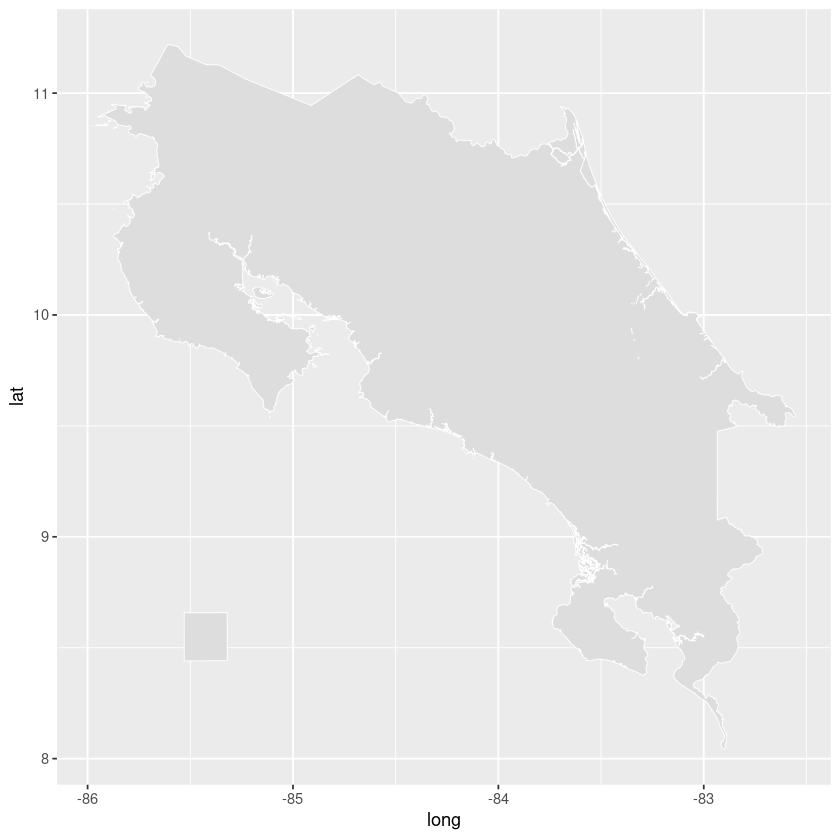

In [17]:
#Y empezamos a graficar
gg <- ggplot()
#La capa de límites.
gg <- gg + geom_map(data=limites_df, map=limites_df,
                      aes(map_id=id, x=long, y=lat, group=group),
                      color="white", fill="#dddddd", size=0.25)

gg

Warning message:
“Unknown or uninitialised column: 'region'.”Warning message:
“Ignoring unknown aesthetics: x, y”

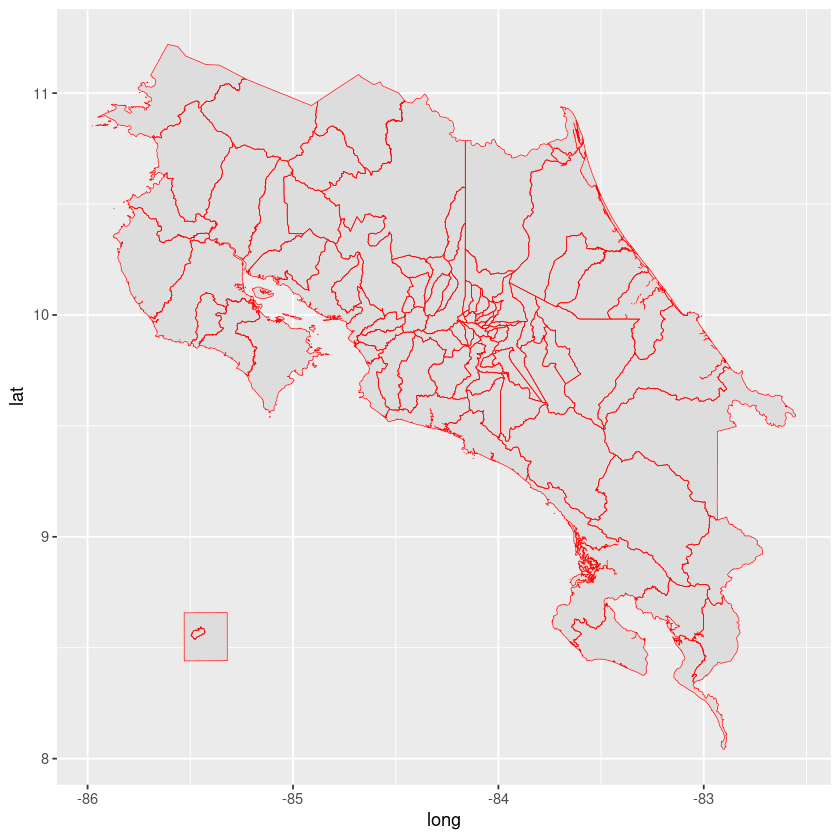

In [19]:
#La capa de cantones
gg <- gg + geom_map(data=cantones_df, map=cantones_df,
                      aes(map_id=id, x=long, y=lat, group=group),
                      color="red", fill="#ffffff00", size=0.2)
gg

Warning message:
“Unknown or uninitialised column: 'region'.”Warning message:
“Ignoring unknown aesthetics: x, y”

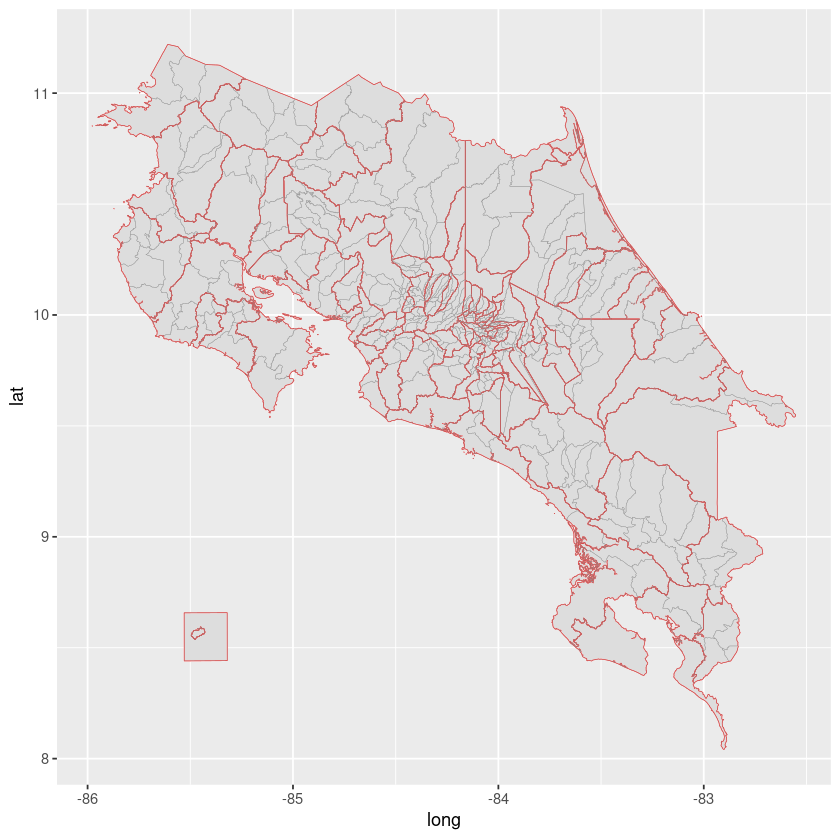

In [20]:
#La capa de distritos
gg <- gg + geom_map(data=distritos_df, map=distritos_df,
                      aes(map_id=id, x=long, y=lat, group=group),
                      color="#999999", fill="#ffffff00", size=0.1)
gg

Warning message:
“Unknown or uninitialised column: 'region'.”Warning message:
“Ignoring unknown aesthetics: x, y”

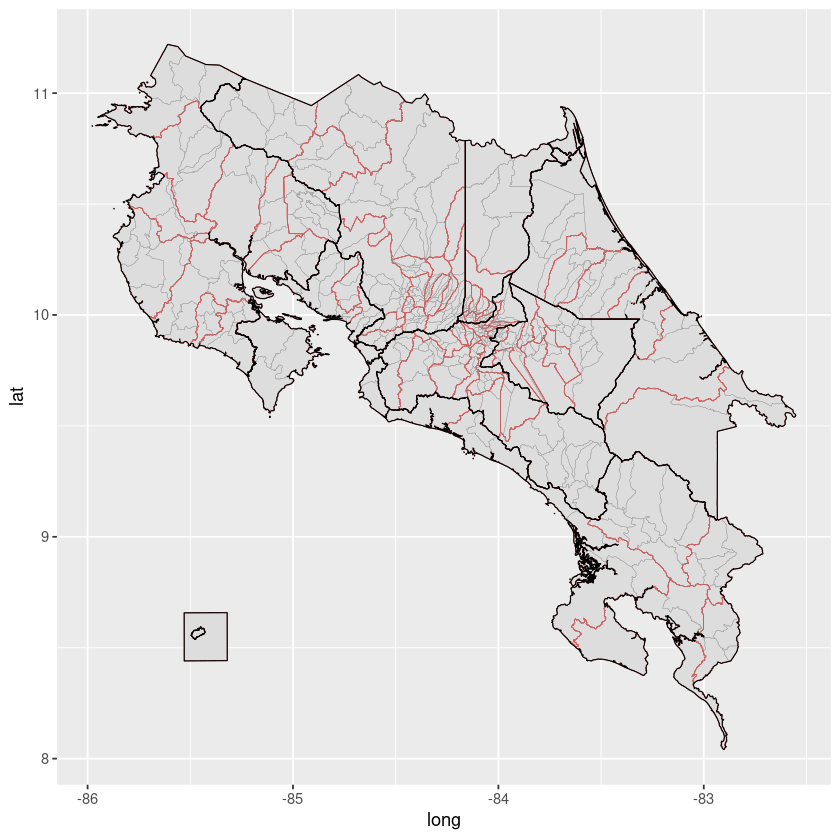

In [21]:
#La capa de provincias
gg <- gg + geom_map(data=provincias_df, map=provincias_df,
                      aes(map_id=id, x=long, y=lat, group=group),
                      color="black", fill="#ffffff00", size=0.33)
gg

Warning message:
“Unknown or uninitialised column: 'subgroup'.”Warning message:
“Unknown or uninitialised column: 'subgroup'.”Warning message:
“Unknown or uninitialised column: 'subgroup'.”Warning message:
“Unknown or uninitialised column: 'subgroup'.”

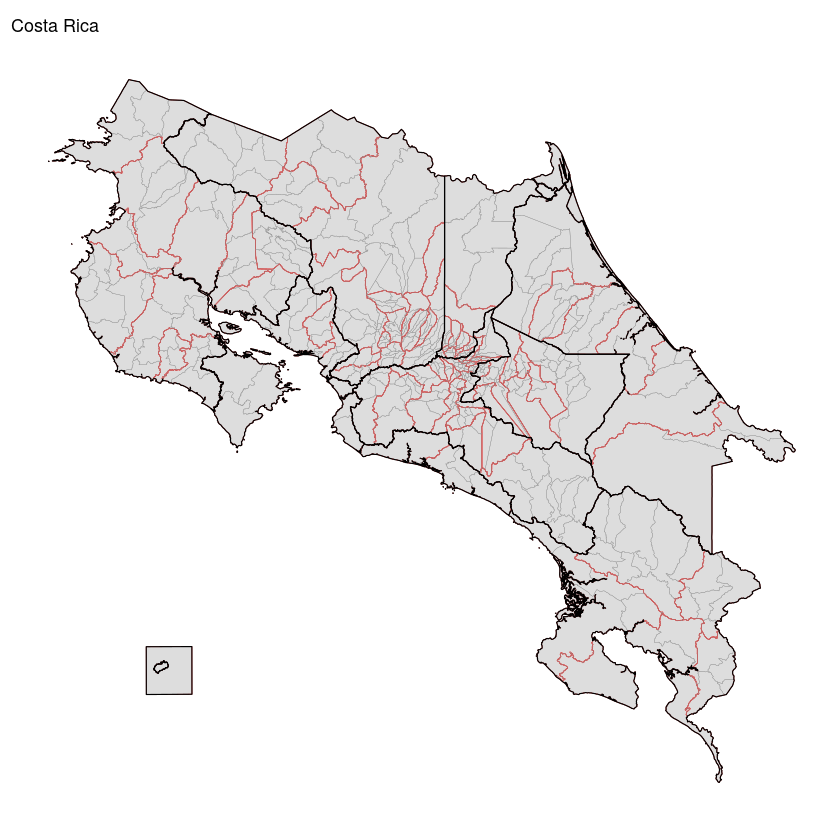

In [22]:
#Le indicamos que es un mapa de coordenadas
gg <- gg + coord_map()
#Le ponemos título
gg <- gg + labs(x="", y="", title="Costa Rica ")
#Y un tema deseado
gg <- gg + theme_map()
gg

# Mapas interactivos

In [25]:
mapa1 <- leaflet() 
saveWidget(mapa1, 'mapa1.html', selfcontained = FALSE)
display_html('<iframe src="mapa1.html" width=500, height=500></iframe>')

In [26]:
mapa1 <- mapa1 %>% 
  addTiles() %>%    #Añade una base de mapa de OpenStreetMap
  setView(lat = 10, lng = -84, zoom = 9)   #Específicamos la ubicación geográfica
saveWidget(mapa1, 'mapa1.html', selfcontained = FALSE)
display_html('<iframe src="mapa1.html" width=500, height=500></iframe>')

In [38]:
dsn_desastres <- "WFS:http://mapas.cne.go.cr/servicios/cne/wfs"
dsn_inec <- "WFS:http://mapassociales.inec.cr/geopc?service=wfs"

In [30]:
dsn_inec

[1] "WFS:http://mapassociales.inec.cr/geopc?service=wfs"

In [39]:
inundaciones <-  st_read(dsn_desastres, "cne:inundaciones")
pobreza <-st_read(dsn_inec,"Inec:total_de_hogares_bajo_la_linea_de_pobreza__lp___2017_01_12_02_01_47__Distritos_Mapas_Sociales__472_2017_01_11" )

Reading layer `cne:inundaciones' from data source `WFS:http://mapas.cne.go.cr/servicios/cne/wfs' using driver `WFS'
Simple feature collection with 994 features and 21 fields
geometry type:  MULTISURFACE
dimension:      XYZ
bbox:           xmin: 296288.9 ymin: 889795.1 xmax: 659119.6 ymax: 1245049
epsg (SRID):    5367
proj4string:    +proj=tmerc +lat_0=0 +lon_0=-84 +k=0.9999 +x_0=500000 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs
Reading layer `Inec:total_de_hogares_bajo_la_linea_de_pobreza__lp___2017_01_12_02_01_47__Distritos_Mapas_Sociales__472_2017_01_11' from data source `WFS:http://mapassociales.inec.cr/geopc?service=wfs' using driver `WFS'
Simple feature collection with 472 features and 5 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: 286766.1 ymin: 889118.8 xmax: 659030.1 ymax: 1241133
epsg (SRID):    5367
proj4string:    +proj=tmerc +lat_0=0 +lon_0=-84 +k=0.9999 +x_0=500000 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_def

In [40]:
inundaciones <- inundaciones %>%  st_transform(crs = "+init=epsg:4326") 
pobreza <- pobreza %>% st_transform(crs = "+init=epsg:4326")

In [41]:
head(inundaciones)

gml_id           FID_ ENTITY     LAYER       COLOR LINETYPE   ELEVATION
1 inundaciones.1   0    LWPolyline DGN_LEVEL_5 7     Continuous 0        
2 inundaciones.10  0    LWPolyline DGN_LEVEL_5 7     Continuous 0        
3 inundaciones.100 0    LWPolyline DGN_LEVEL_5 7     Continuous 0        
4 inundaciones.101 0    LWPolyline DGN_LEVEL_5 7     Continuous 0        
5 inundaciones.102 0    LWPolyline DGN_LEVEL_5 7     Continuous 0        
6 inundaciones.103 0    LWPolyline DGN_LEVEL_5 7     Continuous 0        
  LINEWT REFNAME OID_ the_geom                       ⋯ SymbolID AltMode Base
1 25     NA      0    MULTISURFACE Z (POLYGON Z (... ⋯ 0        0       0   
2 25     NA      0    MULTISURFACE Z (POLYGON Z (... ⋯ 0        0       0   
3 25     NA      0    MULTISURFACE Z (POLYGON Z (... ⋯ 0        0       0   
4 25     NA      0    MULTISURFACE Z (POLYGON Z (... ⋯ 0        0       0   
5 25     NA      0    MULTISURFACE Z (POLYGON Z (... ⋯ 0        0       0   
6 25     NA      0    MULTISURFACE Z (POLYGON Z (... ⋯ 0        0       0   
  Clamped Extruded Snippet PopupInfo Shape_Leng Shape_Area
1 0       0        NA      NA        0          0         
2 0       0        NA      NA        0          0         
3 0       0        NA      NA        0          0         
4 0       0        NA      NA        0          0         
5 0       0        NA      NA        0          0         
6 0       0        NA      NA        0          0         
  the_geom                      
1 MULTISURFACE Z (POLYGON Z (...
2 MULTISURFACE Z (POLYGON Z (...
3 MULTISURFACE Z (POLYGON Z (...
4 MULTISURFACE Z (POLYGON Z (...
5 MULTISURFACE Z (POLYGON Z (...
6 MULTISURFACE Z (POLYGON Z (...

In [42]:
inundaciones<- st_cast(inundaciones, "GEOMETRYCOLLECTION") %>% 
              st_collection_extract("POLYGON")
inundaciones <- st_zm(inundaciones, drop = T, what = "ZM")

In [43]:
head(inundaciones)

gml_id           FID_ ENTITY     LAYER       COLOR LINETYPE   ELEVATION
1 inundaciones.1   0    LWPolyline DGN_LEVEL_5 7     Continuous 0        
2 inundaciones.10  0    LWPolyline DGN_LEVEL_5 7     Continuous 0        
3 inundaciones.100 0    LWPolyline DGN_LEVEL_5 7     Continuous 0        
4 inundaciones.101 0    LWPolyline DGN_LEVEL_5 7     Continuous 0        
5 inundaciones.102 0    LWPolyline DGN_LEVEL_5 7     Continuous 0        
6 inundaciones.103 0    LWPolyline DGN_LEVEL_5 7     Continuous 0        
  LINEWT REFNAME OID_ the_geom                       ⋯ SymbolID AltMode Base
1 25     NA      0    POLYGON ((-84.54919 10.4335... ⋯ 0        0       0   
2 25     NA      0    POLYGON ((-83.29535 10.0302... ⋯ 0        0       0   
3 25     NA      0    POLYGON ((-83.56389 9.23019... ⋯ 0        0       0   
4 25     NA      0    POLYGON ((-83.5656 9.231126... ⋯ 0        0       0   
5 25     NA      0    POLYGON ((-83.5471 9.254527... ⋯ 0        0       0   
6 25     NA      0    POLYGON ((-83.55497 9.22407... ⋯ 0        0       0   
  Clamped Extruded Snippet PopupInfo Shape_Leng Shape_Area
1 0       0        NA      NA        0          0         
2 0       0        NA      NA        0          0         
3 0       0        NA      NA        0          0         
4 0       0        NA      NA        0          0         
5 0       0        NA      NA        0          0         
6 0       0        NA      NA        0          0         
  the_geom                      
1 POLYGON ((-84.54919 10.4335...
2 POLYGON ((-83.29535 10.0302...
3 POLYGON ((-83.56389 9.23019...
4 POLYGON ((-83.5656 9.231126...
5 POLYGON ((-83.5471 9.254527...
6 POLYGON ((-83.55497 9.22407...

In [44]:
head(pobreza)

gml_id                                                                                                                                     
1 total_de_hogares_bajo_la_linea_de_pobreza__lp___2017_01_12_02_01_47__Distritos_Mapas_Sociales__472_2017_01_11.fid-72018bcd_180099e1230_3212
2 total_de_hogares_bajo_la_linea_de_pobreza__lp___2017_01_12_02_01_47__Distritos_Mapas_Sociales__472_2017_01_11.fid-72018bcd_180099e1230_3213
3 total_de_hogares_bajo_la_linea_de_pobreza__lp___2017_01_12_02_01_47__Distritos_Mapas_Sociales__472_2017_01_11.fid-72018bcd_180099e1230_3214
4 total_de_hogares_bajo_la_linea_de_pobreza__lp___2017_01_12_02_01_47__Distritos_Mapas_Sociales__472_2017_01_11.fid-72018bcd_180099e1230_3215
5 total_de_hogares_bajo_la_linea_de_pobreza__lp___2017_01_12_02_01_47__Distritos_Mapas_Sociales__472_2017_01_11.fid-72018bcd_180099e1230_3216
6 total_de_hogares_bajo_la_linea_de_pobreza__lp___2017_01_12_02_01_47__Distritos_Mapas_Sociales__472_2017_01_11.fid-72018bcd_180099e1230_3217
  OGR_FID pcd   nombre                    CATEGORIA
1 1       10101 CARMEN                    1        
2 2       10102 MERCED                    1        
3 3       10103 HOSPITAL                  1        
4 4       10104 CATEDRAL                  1        
5 5       10105 ZAPOTE                    1        
6 6       10106 SAN FRANCISCO DE DOS RIOS 1        
  SHAPE                         
1 MULTIPOLYGON (((-84.06568 9...
2 MULTIPOLYGON (((-84.07857 9...
3 MULTIPOLYGON (((-84.09913 9...
4 MULTIPOLYGON (((-84.08105 9...
5 MULTIPOLYGON (((-84.05364 9...
6 MULTIPOLYGON (((-84.05017 9...

In [35]:
mapa1 <- leaflet() 

In [36]:
mapa1 <- mapa1 %>% 
  addTiles() %>%    #Añade una base de mapa de OpenStreetMap
  setView(lat = 10, lng = -84, zoom = 9)   #Específicamos la ubicación geográfica

In [37]:
mapa1 <- mapa1 %>% 
    addPolylines(data = inundaciones,
               color = "midnightblue",
               weight = 1,
               group = "Zonas con riesgo de inundación",
               opacity = 1)  #Añadimos líneas
saveWidget(mapa1, 'mapa1.html', selfcontained = FALSE)
display_html('<iframe src="mapa1.html" width=500, height=500></iframe>')

In [45]:
unique(pobreza$CATEGORIA)

[1] 1 3 2 4 5

In [46]:
paleta_colores <- colorFactor("RdYlBu", 
                              domain = NULL, 
                              factor(c(5,4,3,2,1), 
                              levels = unique(pobreza$CATEGORIA)[1:5]))
  
  
mapa2 <- leaflet() %>%
  addTiles() %>%    #Añade una base de mapa de OpenStreetMap
  setView(lat = 10, lng = -84, zoom = 9) %>%   #Específicamos la ubicación geográfica
  addPolygons(data = pobreza, 
              fillColor = ~paleta_colores(pobreza$CATEGORIA),
              popup = paste0("<strong> Categoría: </strong>", 
                              pobreza$CATEGORIA,
                              "<br><strong>","Nombre",": ","</strong>",
                              pobreza$nombre),
              color = "black",
              fillOpacity = 0.5,
              opacity = 1,
              weight = 0.5,
              group = "Hogares bajo pobreza extrema",
              highlight = highlightOptions(weight = 2,
                                         color = "yellow",fillColor = "yellow",
                                           bringToFront = T ))  #Añadimos polígonos.
saveWidget(mapa2, 'mapa2.html', selfcontained = FALSE)
display_html('<iframe src="mapa2.html" width=500, height=500></iframe>')

In [47]:
paleta_colores <- colorFactor("RdYlBu", 
                              domain = NULL, 
                              factor(c(5,4,3,2,1), 
                                     levels = unique(pobreza$CATEGORIA)[1:5]))

#Etiquetas que describen las categorías
labels <- c("1: Menos de 186"," 2: De 187 a 858", "3: De 859 a 2003","4: De 2004 a 2769","5: Más de 2770")

mapa3 <- leaflet() %>%
  addTiles() %>%    #Añade una base de mapa de OpenStreetMap
  setView(lat = 10, lng = -84, zoom = 9) %>%   #Específicamos la ubicación geográfica
  addPolylines(data = inundaciones,
               color = "midnightblue",
               weight = 1,
               group = "Zonas con riesgo de inundación",
               opacity = 1) %>% 
  addPolygons(data = pobreza, 
              fillColor = ~paleta_colores(pobreza$CATEGORIA),
              popup = paste0("<strong> Categoría: </strong>", 
                             pobreza$CATEGORIA,
                             "<br><strong>","Nombre",": ","</strong>",
                             pobreza$nombre),
              color = "black",
              fillOpacity = 0.8,
              opacity = 1,
              weight = 0.5,
              group = "Categorías de pobreza",
              highlight = highlightOptions(weight = 2,
                                           color = "yellow",fillColor = "yellow",
                                           bringToFront = T ))   %>% 
  #Control de capas
  addLayersControl(overlayGroups = c("Zonas con riesgo de inundación", "Categorías de pobreza"), 
                   options = layersControlOptions(collapsed = TRUE)) %>% 
  #Leyenda
  addLegend(pal=paleta_colores,
            values = pobreza$CATEGORIA,opacity = 1,
            labFormat = function(type, cuts, p) { 
              paste0(labels)
            }
  )
saveWidget(mapa3, 'mapa3.html', selfcontained = FALSE)
display_html('<iframe src="mapa3.html" width=500, height=500></iframe>')

In [48]:
casasCulturales <- st_read("dataset/CasasCulturales.shp")

Reading layer `CasasCulturales' from data source `/home/ansoto/Taller de Visualización/dataset/CasasCulturales.shp' using driver `ESRI Shapefile'
Simple feature collection with 116 features and 16 fields
geometry type:  POINT
dimension:      XY
bbox:           xmin: -85.58614 ymin: 8.820311 xmax: -82.75438 ymax: 10.62983
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


In [49]:
casasCulturales

id   nid  title                                                          
1   1047 6835 Casa de la Cultura de Osa                                      
2   1080 6257 Centro Cultural Costarricense Norteamericano Heredia           
3   1210 5303 Casa de la Ciudad del Tecnológico de Costa Rica                
4   1237 5290 Instituto Cultural de México en Costa Rica                     
5   1238 5192 Centro Alajuelense de la Cultura                               
6   1239 5193 Casa de la Cultura de Guayabo de Mora                          
7   1240 5194 Centro Costarricense de Ciencia y Cultura, "Museo de los Niños"
8   1241 5195 Centro Cultural Costarricense Norteamericano Alajuela          
9   1242 5196 Centro Cultural Costarricense Norteamericano Cartago           
10  1243 5197 Centro Cultural Costarricense Norteamericano San Pedro         
11  1244 5199 Centro Cultural de San Pablo de Heredia                        
12  1245 5200 Casa de Cultura de Coto Brus, San Vito                         
13  1246 5201 Centro Cultural del Este, Casa del Artista                     
14  1247 5202 Centro Cultural e Histórico José Figueres Ferrer               
15  1248 5203 Centro Cultural Escazuceño                                     
16  1249 5204 Centro Cultural Herediano Omar Dengo                           
17  1250 5206 Centro Cultural y Educativo Costarricense Chino                
18  1260 5218 Centro  de la Cultura Cartaginesa                              
19  1261 5219 Centro de la Cultura de Grecia                                 
20  1262 5220 Casa de la Cultura de La Unión                                 
21  1265 5223 Centro Nacional de la Cultura (CENAC) del MCJ                  
22  1272 5233 Complejo Cultural de Pérez Zeledón                             
23  1282 5149 Casa Cultural Amón del TEC                                     
24  1283 5150 Complejo Cultural COPAZA - Quepos                              
25  1284 5151 Casa de Cultura de Agua Caliente, Cartago                      
26  1285 5152 Casa de Cultura de Pococí                                      
27  1286 5154 Casa de la Cultura Alfredo González Flores                     
28  1287 5155 Centro Cultural Comunitario de Las Juntas de Abangares         
29  1289 5157 Casa de la Cultura de Bagaces                                  
30  1290 5158 Casa de la Cultura de Barva                                    
⋮   ⋮    ⋮    ⋮                                                              
87  1285 5152 Casa de Cultura de Pococí                                      
88  1286 5154 Casa de la Cultura Alfredo González Flores                     
89  1287 5155 Centro Cultural Comunitario de Las Juntas de Abangares         
90  1289 5157 Casa de la Cultura de Bagaces                                  
91  1290 5158 Casa de la Cultura de Barva                                    
92  1291 5159 Casa de la Cultura de Belén                                    
93  1292 5160 Casa de la Cultura de Cañas                                    
94  1293 5161 Casa de la Cultura de Ciudad Quesada                           
95  1294 5162 Casa de la Cultura de Limón                                    
96  1295 5164 CASA DE LA CULTURA DE MORA                                     
97  1296 5166 Casa de la Cultura de Nandayure                                
98  1297 5167 Casa de la Cultura de Naranjo                                  
99  1298 5168 Casa de la Cultura Municipal de Nicoya                         
100 1299 5169 Casa de la Cultura Marcus Garvey de Puerto Viejo               
101 1300 5170 Casa de la Cultura de Puntarenas, Elsie Canessa de Odio        
102 1301 5171 Casa de la Cultura de San Rafael de Heredia                    
103 1302 5172 Casa de la Cultura de Santa Cruz                               
104 1303 5173 Casa Domingueña de la Cultura                                  
105 1304 5174 Casa de la Cultura de Siquirres                                
106 1305 5175 Casa de la C

In [50]:
bienestar <- st_read(dsn_inec, "Inec:distribucion_del_indice_de_bienestar_de_la_ninez_y_la_adolescencia__477___2017_01_14_11_01_23__Distritos_Mapas_Sociales__477_2017_01_14")

Reading layer `Inec:distribucion_del_indice_de_bienestar_de_la_ninez_y_la_adolescencia__477___2017_01_14_11_01_23__Distritos_Mapas_Sociales__477_2017_01_14' from data source `WFS:http://mapassociales.inec.cr/geopc?service=wfs' using driver `WFS'
Simple feature collection with 477 features and 6 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: 286766.1 ymin: 889118.8 xmax: 659030.1 ymax: 1241133
epsg (SRID):    5367
proj4string:    +proj=tmerc +lat_0=0 +lon_0=-84 +k=0.9999 +x_0=500000 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs


In [51]:
head(bienestar)

gml_id                                                                                                                                                               
1 distribucion_del_indice_de_bienestar_de_la_ninez_y_la_adolescencia__477___2017_01_14_11_01_23__Distritos_Mapas_Sociales__477_2017_01_14.fid-72018bcd_180099e1230_658d
2 distribucion_del_indice_de_bienestar_de_la_ninez_y_la_adolescencia__477___2017_01_14_11_01_23__Distritos_Mapas_Sociales__477_2017_01_14.fid-72018bcd_180099e1230_658e
3 distribucion_del_indice_de_bienestar_de_la_ninez_y_la_adolescencia__477___2017_01_14_11_01_23__Distritos_Mapas_Sociales__477_2017_01_14.fid-72018bcd_180099e1230_658f
4 distribucion_del_indice_de_bienestar_de_la_ninez_y_la_adolescencia__477___2017_01_14_11_01_23__Distritos_Mapas_Sociales__477_2017_01_14.fid-72018bcd_180099e1230_6590
5 distribucion_del_indice_de_bienestar_de_la_ninez_y_la_adolescencia__477___2017_01_14_11_01_23__Distritos_Mapas_Sociales__477_2017_01_14.fid-72018bcd_180099e1230_6591
6 distribucion_del_indice_de_bienestar_de_la_ninez_y_la_adolescencia__477___2017_01_14_11_01_23__Distritos_Mapas_Sociales__477_2017_01_14.fid-72018bcd_180099e1230_6592
  OGR_FID pcd   nombre                   VALOR CATEGORIA
1 1       10101 Carmen                   73.07 1        
2 2       10102 Merced                   52.96 3        
3 3       10103 Hospital                 49.63 3        
4 4       10104 Catedral                 58.03 2        
5 5       10105 Zapote                   70.99 1        
6 6       10106 San Francisco de Dos Ros 76.52 1        
  SHAPE                         
1 MULTIPOLYGON (((492798.4 10...
2 MULTIPOLYGON (((491385 1099...
3 MULTIPOLYGON (((489059.7 10...
4 MULTIPOLYGON (((491112.5 10...
5 MULTIPOLYGON (((494489.4 10...
6 MULTIPOLYGON (((493041.8 10...

In [52]:
casasCulturales <- casasCulturales %>%  st_transform(crs = "+init=epsg:4326") 
bienestar <- bienestar %>%  st_transform(crs = "+init=epsg:4326") 

In [53]:
mapa4 <- leaflet() %>%
  addTiles() %>%    #Añade una base de mapa de OpenStreetMap
  setView(lat = 10, lng = -84, zoom = 9) %>%   #Específicamos la ubicación geográfica
  addCircleMarkers(data = casasCulturales,
                   popup = paste0("<strong> Nombre: </strong>", 
                                  casasCulturales$title),
                   radius = 5,
                   stroke = FALSE,
                   color = "red",
                   fillOpacity = 1,
                   opacity = 1,
                   group = "Casas") #Añadimos capa de puntos
saveWidget(mapa4, 'mapa4.html', selfcontained = FALSE)
display_html('<iframe src="mapa4.html" width=500, height=500></iframe>')

In [54]:
#Paleta de colores numérica
paleta_colores <- colorNumeric(
  palette = 'Greens',
  domain = bienestar$VALOR) 

mapa5 <- leaflet() %>%
  addTiles() %>%    #Añade una base de mapa de OpenStreetMap
  setView(lat = 10, lng = -84, zoom = 9) %>%   #Específicamos la ubicación geográfica
  addPolygons(data = bienestar, 
              fillColor = ~paleta_colores(bienestar$VALOR),
              popup = paste0("<strong> Índice de bienestar: </strong>", 
                             bienestar$VALOR,
                             "<br><strong>","Nombre",": ","</strong>",
                             bienestar$nombre),
              color = "black",
              fillOpacity = 0.5,
              opacity = 1,
              weight = 2,
              group = "BIENESTAR",
              highlight = highlightOptions(weight = 2,
                                           color = "blue")) #Añadimos polígonos
saveWidget(mapa5, 'mapa5.html', selfcontained = FALSE)
display_html('<iframe src="mapa5.html" width=500, height=500></iframe>')

In [55]:
mapa6 <- leaflet() %>%
  addTiles() %>%
  setView(lat = 10, lng = -84, zoom = 9) %>%
  addPolygons(data = bienestar, 
              fillColor = ~paleta_colores(bienestar$VALOR),
              popup = paste0("<strong> Índice de bienestar: </strong>", 
                             bienestar$VALOR,
                             "<br><strong>","Nombre",": ","</strong>",
                             bienestar$nombre),
              color = "black",
              fillOpacity = 0.5,
              opacity = 1,
              weight = 2,
              group = "Bienestar",
              highlight = highlightOptions(weight = 2,
                                           color = "blue")) %>% #agrega poligonos
  addCircleMarkers(data = casasCulturales,
                   popup = paste0("<strong> Nombre: </strong>", 
                                  casasCulturales$title),
                   radius = 5,
                   stroke = FALSE,
                   color = "red",
                   fillOpacity = 1,
                   opacity = 1,
                   group = "Casas Culturales") %>%  #Añade círculos
  addLayersControl(overlayGroups = c("Bienestar", "Casas Culturales"),
                   options = layersControlOptions(collapsed = TRUE)) %>% 
  addLegend(pal=paleta_colores,values = bienestar$VALOR,opacity = 1) 
saveWidget(mapa6, 'mapa6.html', selfcontained = FALSE)
display_html('<iframe src="mapa6.html" width=500, height=500></iframe>')

In [57]:
library(leaflet.minicharts)
library(readxl)
educacion_regional <- read_excel("dataset/Datos_regiones_educación_regular_5_24.xlsx")
educacion_regional

Region                  lat       lng       año  No Asisten Asisten
1  Región Central          10.003940 -84.07123 2015 25.6       74.4   
2  Región Chorotega        10.515515 -85.30312 2015 24.0       76.0   
3  Región Pacífico Central  9.689763 -84.62407 2015 29.5       70.5   
4  Región Brunca            9.015812 -83.24857 2015 23.1       76.9   
5  Región Huetar Atlántica 10.123377 -83.34347 2015 30.5       69.5   
6  Región Huetar Norte     10.557076 -84.35159 2015 31.4       68.6   
7  Región Central          10.003940 -84.07123 2014 25.9       74.1   
8  Región Chorotega        10.515515 -85.30312 2014 25.2       74.8   
9  Región Pacífico Central  9.689763 -84.62407 2014 30.1       69.9   
10 Región Brunca            9.015812 -83.24857 2014 24.8       75.2   
11 Región Huetar Atlántica 10.123377 -83.34347 2014 28.1       71.9   
12 Región Huetar Norte     10.557076 -84.35159 2014 28.3       71.7   
13 Región Central          10.003940 -84.07123 2013 26.2       73.8   
14 Región Chorotega        10.515515 -85.30312 2013 28.3       71.7   
15 Región Pacífico Central  9.689763 -84.62407 2013 28.4       71.6   
16 Región Brunca            9.015812 -83.24857 2013 24.8       75.2   
17 Región Huetar Atlántica 10.123377 -83.34347 2013 27.5       72.5   
18 Región Huetar Norte     10.557076 -84.35159 2013 29.4       70.6   
19 Región Central          10.003940 -84.07123 2012 27.3       72.7   
20 Región Chorotega        10.515515 -85.30312 2012 29.5       70.5   
21 Región Pacífico Central  9.689763 -84.62407 2012 27.7       72.3   
22 Región Brunca            9.015812 -83.24857 2012 28.6       71.4   
23 Región Huetar Atlántica 10.123377 -83.34347 2012 30.4       69.6   
24 Región Huetar Norte     10.557076 -84.35159 2012 32.9       67.1

In [58]:
educacion_regional_2013 <- educacion_regional %>% filter(año==2013)

mapa <- leaflet() %>%
addTiles() %>%    
setView(lat = 10, lng = -84, zoom = 9) %>%
addProviderTiles("CartoDB.VoyagerNoLabels") %>% 
 addMinicharts(educacion_regional_2013$lng,educacion_regional_2013$lat,type = "pie",chartdata =educacion_regional_2013[,c("Asisten","No Asisten")], width = 45,showLabels = T,height = 45 )
mapa
saveWidget(mapa, 'mapa.html', selfcontained = FALSE)
display_html('<iframe src="mapa.html" width=500, height=500></iframe>')

ERROR while rich displaying an object: Error in file(file, "rb"): argumento 'description' inválido

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.htmlwidget(obj)
9. lapply(obj$dependencies, function(dep) {
 .     html <- c()
 .     if (length(dep$script) > 0) {
 .         f <- file.path(dep$src$file, dep$script)
 .         html <- c(html, sprintf("<script src=\"%s\"></script>", 
 .             dataURI(mime = "appli

HTML widgets cannot be represented in plain text (need html)

In [ ]:
mapa2 <- leaflet() %>%
addTiles() %>%    
setView(lat = 10, lng = -84, zoom = 9) %>%
addProviderTiles("CartoDB.VoyagerNoLabels") %>% 
 addMinicharts(educacion_regional_2013$lng,educacion_regional_2013$lat,chartdata =educacion_regional[,c("Asisten","No Asisten")],time = educacion_regional$año, width = 45,showLabels = T,height = 45 )
mapa2